In [14]:
import math

data = [[0,0], [0,1], [-1,2], [2,0], [3,0], [4,-1]]

c1 = data[0]
c2 = data[-1]

def euclidian_distance(a, b):
    sum_res = 0
    for i in zip(a, b):
        sum_res += (i[0] - i[1])**2
    return sum_res


assert euclidian_distance([0, 0], [0, 0]) == 0
assert euclidian_distance([0, 0], [1, 4]) == 17



In [15]:
def clustering(c1, c2, X):
    cluster1, cluster2 = [], []
    for i in X:
        if euclidian_distance(c1, i) < euclidian_distance(c2, i):
            cluster1.append(i)
        else:
            cluster2.append(i)
    return cluster1, cluster2

print(clustering(c1, c2, data))

([[0, 0], [0, 1], [-1, 2], [2, 0]], [[3, 0], [4, -1]])


In [16]:
def new_centroid(X):
    r = [0, 0]
    for i in X:
        r[0] = r[0] + i[0]
        r[1] = r[1] + i[1]
    if(len(X) != 0):
        r[0] /= len(X)
        r[1] /= len(X)
    return r

print(new_centroid(clustering(c1, c2, data)[0]))
print(new_centroid(clustering(c1, c2, data)[1]))

[0.25, 0.75]
[3.5, -0.5]


In [21]:
c1, c2 = data[0], data[-1]

for i in range(2):
    clusters = clustering(c1, c2, data)
    print(f"Iteration: {i+1} C1: {c1} C2: {c2} Cluster 1: {clusters[0]} Cluster 2: {clusters[1]}")
    c1 = new_centroid(clustering(c1, c2, data)[0])
    c2 = new_centroid(clustering(c1, c2, data)[1])
    print(f"New centroids C1: {c1} C2: {c2}")

Iteration: 1 C1: [0, 0] C2: [4, -1] Cluster 1: [[0, 0], [0, 1], [-1, 2], [2, 0]] Cluster 2: [[3, 0], [4, -1]]
New centroids C1: [0.25, 0.75] C2: [3.5, -0.5]
Iteration: 2 C1: [0.25, 0.75] C2: [3.5, -0.5] Cluster 1: [[0, 0], [0, 1], [-1, 2]] Cluster 2: [[2, 0], [3, 0], [4, -1]]
New centroids C1: [-0.3333333333333333, 1.0] C2: [3.0, -0.3333333333333333]


In [22]:
while True:
    cl1, cl2 = clustering(c1, c2, data)
    _c1 = c1
    _c2 = c2
    c1 = new_centroid(cl1)
    c2 = new_centroid(cl2)
    if _c1 == c1 and _c2 == c2:
        break

print(c1)
print(c2)

[-0.3333333333333333, 1.0]
[3.0, -0.3333333333333333]


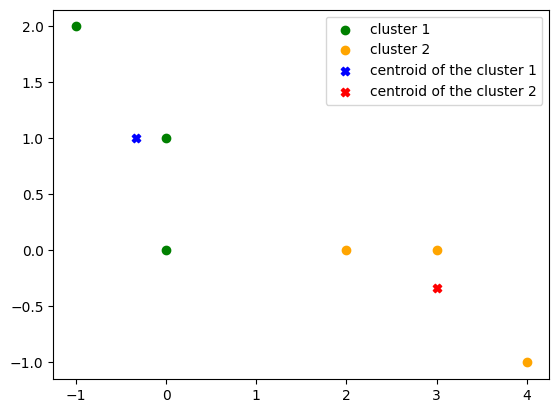

In [32]:
import matplotlib.pyplot as plt
import numpy as np

val = np.array(data)
cluster1, cluster2 = np.array(clustering(c1, c2, data)[0]), np.array(clustering(c1, c2, data)[1])

plt.scatter(cluster1[:, 0], cluster1[:, 1], color="green", label="cluster 1")
plt.scatter(cluster2[:, 0], cluster2[:, 1], color="orange", label="cluster 2")
plt.scatter(c1[0], c1[1], marker='X', color="blue", label="centroid of the cluster 1")
plt.scatter(c2[0], c2[1], marker='X', color="red", label="centroid of the cluster 2")

plt.legend()
plt.show()